In [1]:
import data_analysis_funcs as daf
import matplotlib.pyplot as plt

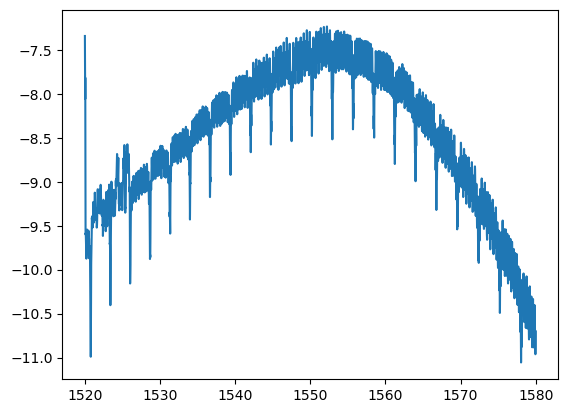

In [2]:
data_analyse_file="sg_rr_36_025 2023-12-13 16-41-08.csv"
wvlen_array,pow_array=daf.get_wavlen_and_pow_arrays(data_analyse_file)
daf.plot_visualise(wvlen_array,pow_array, full_range=True)

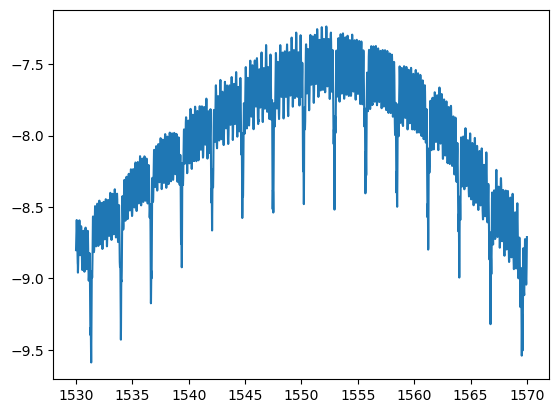

1530.0
1570.0


In [4]:
start_point_index=1000
end_point_index=5001
daf.plot_visualise(wvlen_array,pow_array,full_range=False,start_index=start_point_index,stop_index=end_point_index)
wvlen_peak_search=wvlen_array[start_point_index:end_point_index]
power_peak_search=pow_array[start_point_index:end_point_index]
print(wvlen_peak_search[0])
print(wvlen_peak_search[-1])

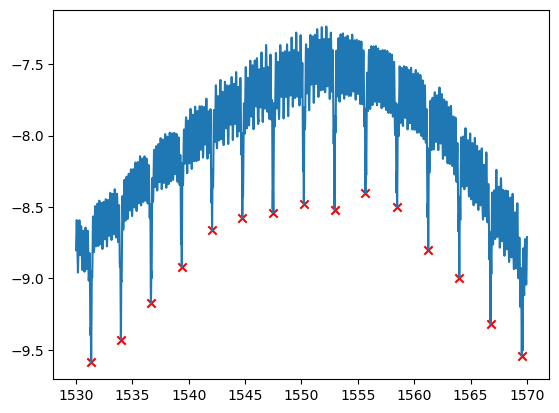

15
[1531.35, 1533.98, 1536.64, 1539.38, 1542.07, 1544.75, 1547.5, 1550.21, 1552.93, 1555.67, 1558.49, 1561.24, 1564.0, 1566.77, 1569.54]


In [5]:
wvlen_step_size=0.01
approx_fsr=2.5
promin_use=0.6
dist_use=(approx_fsr/2)/wvlen_step_size
#dist_use=1
peak_locs,n_peaks,peak_wavelens,peak_powers=daf.give_peak_locs(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
plt.plot(wvlen_peak_search,power_peak_search)
plt.scatter(peak_wavelens,peak_powers,color="red", marker="x")
plt.show()
print(n_peaks)#just added for sanity check
print(peak_wavelens)#sanity check

In [6]:
fsr_values=daf.calc_fsrs(peak_wavelens)
fsr_mean,fsr_error=daf.fsr_avg_and_error(fsr_values)
print(fsr_values)
print(fsr_mean)
print(fsr_error)

[2.63 2.66 2.74 2.69 2.68 2.75 2.71 2.72 2.74 2.82 2.75 2.76 2.77 2.77]
2.7278571428571468
0.01339093392783853


Now to calculate peak widths below:

[0.13548842 0.17710511 0.12390424 0.12486158 0.20956656 0.14169023
 0.14142853 0.13660353 0.14634893 0.14747032 0.13836109 0.13981082
 0.15034956 0.14429091 0.14282696]


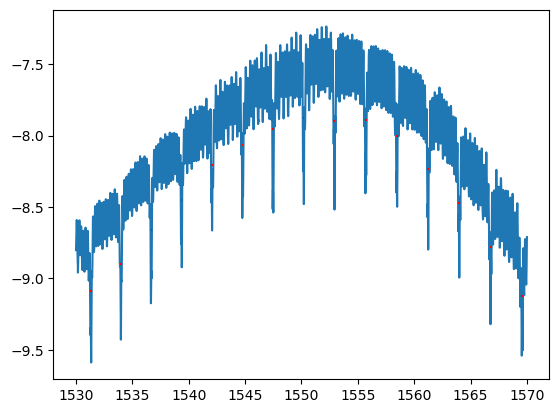

In [7]:
peak_width_data=daf.get_peak_FWHM(wvlen_step_size,approx_fsr,promin_use,dist_use,wvlen_peak_search,power_peak_search)
peak_widths=peak_width_data[0]
print(peak_widths)
peak_width_heights=peak_width_data[1]
peak_width_lefts=peak_width_data[2]
peak_width_rights=peak_width_data[3]
daf.plot_lines_FWHM(peak_width_heights,peak_width_lefts,peak_width_rights,wvlen_peak_search,power_peak_search)


Now calculating mean and standard error on FWHM using same func as for fsr:

In [8]:
mean_FWHM,FWHM_error=daf.fsr_avg_and_error(peak_widths)
print(mean_FWHM)
print(FWHM_error)


0.14667378582533513
0.005479655091853432
